Heart disease describes a range of conditions that affect your heart. Heart disease is one of the biggest causes of morbidity and mortality among the population of the world. Prediction of heart disease is regarded as one of the most important subjects in the section of clinical data analysis. 

On the other hand, Machine learning (ML) proves to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry. 

In [1]:
# load libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

'target' column stands for the target classify value: Heart disease (0 = no, 1 = yes)



In [2]:
# we use the UCI Heart Disease Dataset.
data = pd.read_csv("/content/drive/MyDrive/automated slide decks/dataset/heart_dis.csv")
data.head()

## Data Exploration

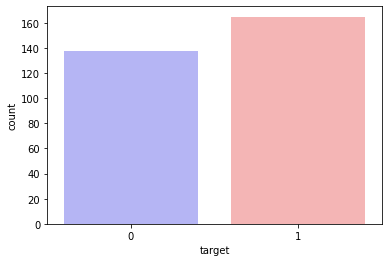

In [4]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

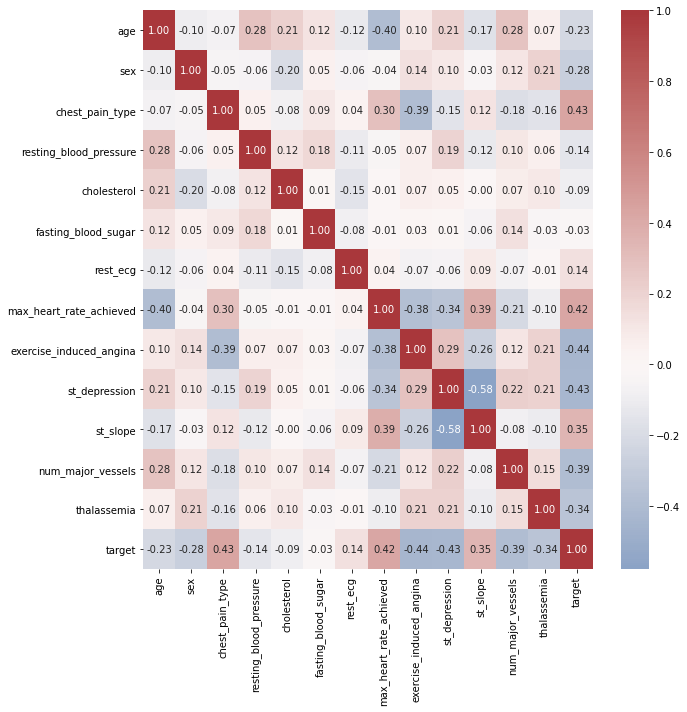

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f', center=0, cmap='vlag')
plt.tight_layout()
plt.show()

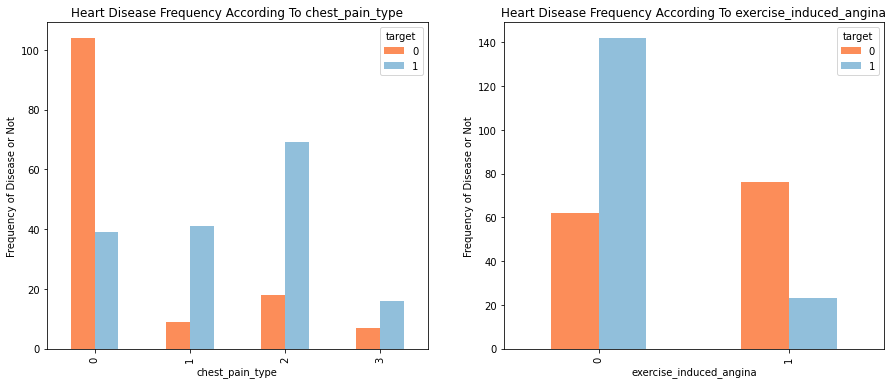

In [6]:
norminal_col = ['chest_pain_type', 'exercise_induced_angina']
fig, axs = plt.subplots(ncols=2, figsize=(18,12))
for i in range(2):
  pd.crosstab(data[norminal_col[i]],data.target).plot(kind="bar",figsize=(15,6),color=['#fc8d59','#91bfdb'], ax=axs[i])
  axs[i].set_title('Heart Disease Frequency According To ' + norminal_col[i])
  axs[i].set_xlabel(norminal_col[i])
  axs[i].set_ylabel('Frequency of Disease or Not')

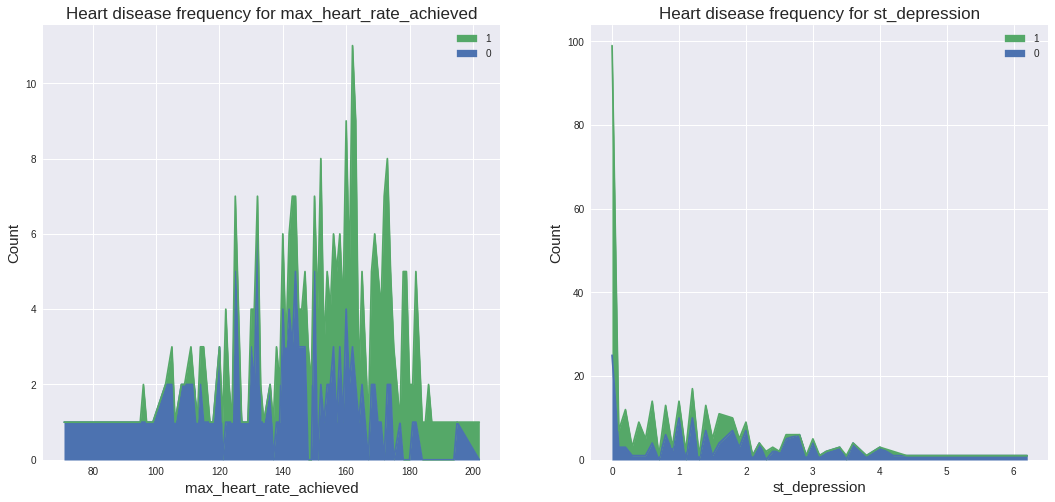

In [7]:
numerical_colms = ['max_heart_rate_achieved', 'st_depression']
plt.style.use('seaborn')
fig, axs = plt.subplots(ncols=2, figsize=(18,8))
for i in range(2):
  pd.crosstab(data[numerical_colms[i]],data.target).plot.area(ax=axs[i])
  axs[i].set_xlabel(numerical_colms[i], fontsize=15)
  axs[i].set_ylabel('Count', fontsize=15)
  axs[i].set_title('Heart disease frequency for '+ numerical_colms[i],fontsize=17)
  handles, labels = axs[i].get_legend_handles_labels()
  labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
  axs[i].legend(handles, labels)

## Data Processing

### Feature Creations

In [8]:
# Based on domain experience
def fe_creation(df):
    df['age2'] = df['age']//10
    df['resting_blood_pressure2'] = df['resting_blood_pressure']//10
    df['chol2'] = df['cholesterol']//40
    return df

data = fe_creation(data)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age2,resting_blood_pressure2,chol2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6,14,5
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3,13,6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4,13,5
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,5,12,5
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5,12,8


### Creating Dummy Variables

Since 'chest_pain_type', 'thalassemia' and 'st_slope' are categorical variables we'll turn them into dummy variables.

In [9]:
a = pd.get_dummies(data['chest_pain_type'], prefix = "cp")
b = pd.get_dummies(data['thalassemia'], prefix = "thal")
c = pd.get_dummies(data['st_slope'], prefix = "slope")
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age2,resting_blood_pressure2,chol2,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6,14,5,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3,13,6,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4,13,5,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,5,12,5,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5,12,8,1,0,0,0,0,0,1,0,0,0,1


## MODEL, TRAINING and TESTING

In [10]:
dataX=data.drop('target',axis=1)
dataY=data['target']
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [11]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 27)
X_test (61, 27)
y_train (242,)
y_test (61,)


The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

In [12]:
#Normalization as the first process
# Normalize
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values
accuracies = {}

### K-Nearest Neighbour (KNN) Classification

In [13]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 NN Score: 75.41%


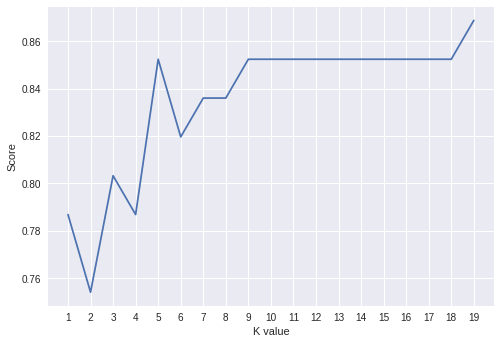

Maximum KNN Score is 86.89%


In [14]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

### Support Vector Machine (SVM) Algorithm

In [15]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 86.89%


### Decision Tree Algorithm

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 85.25%


### Random Forest Classification

In [17]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 90.16%
